importing the required libraries


In [16]:

import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

connecting the keras with tensorflow backend

In [2]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

Iterate through all images in Parasitized folder, resize to 64 x 64
Then save as numpy array with name 'dataset'
Set the label to this as 0


In [3]:
image_directory = 'cell_images2/'
SIZE = 64
dataset = [] 
label = []  #Place holders to define add labels.

 We will add 0 to all parasitized images and 1 to uninfected.

In [4]:
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [5]:
uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

making the CNN model


In [6]:
INPUT_SHAPE = (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)


Flatten the matrix to get it ready for dense.

In [8]:
flat = keras.layers.Flatten()(drop2)
hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

for output layer of the model

In [10]:
out = keras.layers.Dense(2, activation='sigmoid')(drop4)

calculating the summary of the model

In [11]:
model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0     

spliting of the data set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

fitting the input data to the model

In [18]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 30,     
                         validation_split = 0.1,
                         shuffle = False)


Epoch 1/30
12/12 [==============================] - 25s 451ms/step - loss: 1.1539 - accuracy: 0.5746 - val_loss: 32.8524 - val_accuracy: 0.5625
Epoch 2/30
12/12 [==============================] - 5s 376ms/step - loss: 0.4292 - accuracy: 0.8040 - val_loss: 24.3856 - val_accuracy: 0.5875
Epoch 3/30
12/12 [==============================] - 5s 377ms/step - loss: 0.3240 - accuracy: 0.8644 - val_loss: 13.8113 - val_accuracy: 0.6000
Epoch 4/30
12/12 [==============================] - 5s 376ms/step - loss: 0.2201 - accuracy: 0.9082 - val_loss: 9.5621 - val_accuracy: 0.6625
Epoch 5/30
12/12 [==============================] - 5s 376ms/step - loss: 0.1605 - accuracy: 0.9413 - val_loss: 7.4953 - val_accuracy: 0.7125
Epoch 6/30
12/12 [==============================] - 5s 374ms/step - loss: 0.1080 - accuracy: 0.9548 - val_loss: 4.8855 - val_accuracy: 0.7125
Epoch 7/30
12/12 [==============================] - 4s 373ms/step - loss: 0.0861 - accuracy: 0.9752 - val_loss: 4.7219 - val_accuracy: 0.7125
Ep

Accuracy calculation

In [19]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))


7/7 [==============================] - 0s 44ms/step - loss: 0.5527 - accuracy: 0.8050
Test_Accuracy: 80.50%


visualization of the accuracy and loss function at each epoch

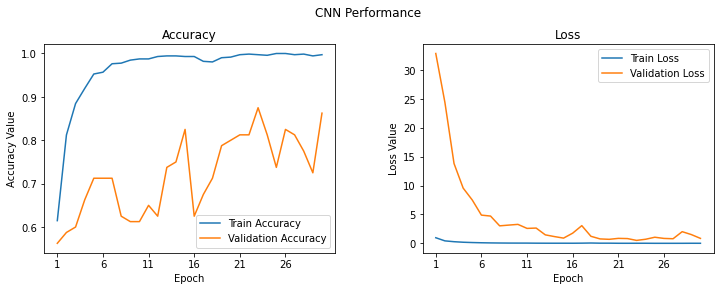

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

saving the model

In [21]:
model.save('malaria_cnn.h5')